In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn import preprocessing

In [23]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df = df.drop(columns=[
    'anaemia', 'diabetes', 'high_blood_pressure',
    'sex','smoking','time','DEATH_EVENT'
])
df

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
0,75.0,582,20,265000.00,1.9,130
1,55.0,7861,38,263358.03,1.1,136
2,65.0,146,20,162000.00,1.3,129
3,50.0,111,20,210000.00,1.9,137
4,65.0,160,20,327000.00,2.7,116
...,...,...,...,...,...,...
294,62.0,61,38,155000.00,1.1,143
295,55.0,1820,38,270000.00,1.2,139
296,45.0,2060,60,742000.00,0.8,138
297,45.0,2413,38,140000.00,1.4,140


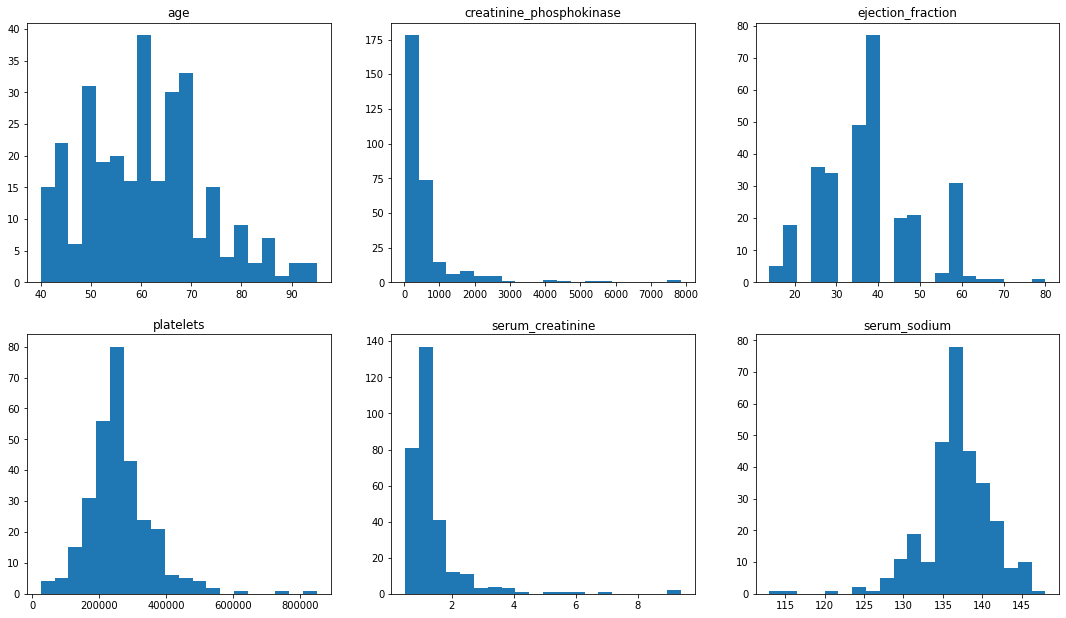

In [3]:
n_bins = 20
fig, axs = plt.subplots(2,3)
axs[0, 0].hist(df['age'].values, bins = n_bins)
axs[0, 0].set_title('age')
axs[0, 1].hist(df['creatinine_phosphokinase'].values, bins = n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')
axs[0, 2].hist(df['ejection_fraction'].values, bins = n_bins)
axs[0, 2].set_title('ejection_fraction')
axs[1, 0].hist(df['platelets'].values, bins = n_bins)
axs[1, 0].set_title('platelets')
axs[1, 1].hist(df['serum_creatinine'].values, bins = n_bins)
axs[1, 1].set_title('serum_creatinine')
axs[1, 2].hist(df['serum_sodium'].values, bins = n_bins)
axs[1, 2].set_title('serum_sodium')

fig.set_size_inches(18.5, 10.5)

In [4]:
df.describe().append(
    pd.DataFrame(df.var(), columns=['variance']).T
).append(
    df.mode().rename(index={0: 'mode'})
).drop(['25%', '50%', '75%', 'count']).round(2)

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
mean,60.83,581.84,38.08,2.633580e+05,1.39,136.63
std,11.89,970.29,11.83,9.780424e+04,1.03,4.41
min,40.00,23.00,14.00,2.510000e+04,0.50,113.00
max,95.00,7861.00,80.00,8.500000e+05,9.40,148.00
variance,141.49,941458.57,140.06,9.565669e+09,1.07,19.47
mode,60.00,582.00,35.00,2.633580e+05,1.00,136.00


In [5]:
data = df.to_numpy(dtype='float')

In [6]:
scaler = preprocessing.StandardScaler().fit(data[:150, :])

In [7]:
data_scaled = scaler.transform(data)

In [8]:
def draw_plots(data):
    fig, axs = plt.subplots(2,3)
    axs[0, 0].hist(data[:,0], bins = n_bins)
    axs[0, 0].set_title('age')
    axs[0, 1].hist(data[:,1], bins = n_bins)
    axs[0, 1].set_title('creatinine_phosphokinase')
    axs[0, 2].hist(data[:,2], bins = n_bins)
    axs[0, 2].set_title('ejection_fraction')
    axs[1, 0].hist(data[:,3], bins = n_bins)
    axs[1, 0].set_title('platelets')
    axs[1, 1].hist(data[:,4], bins = n_bins)
    axs[1, 1].set_title('serum_creatinine')
    axs[1, 2].hist(data[:,5], bins = n_bins)
    axs[1, 2].set_title('serum_sodium')
    fig.set_size_inches(18.5, 10.5)

def get_data_info(data):
    df = pd.DataFrame(
        data=data, 
        columns=['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']
    )
    return df.describe().append(
        pd.DataFrame(df.var(), columns=['variance']).T
    ).append(
        df.mode().rename(index={0: 'mode'})
    ).drop(['25%', '50%', '75%', 'count']).round(2)

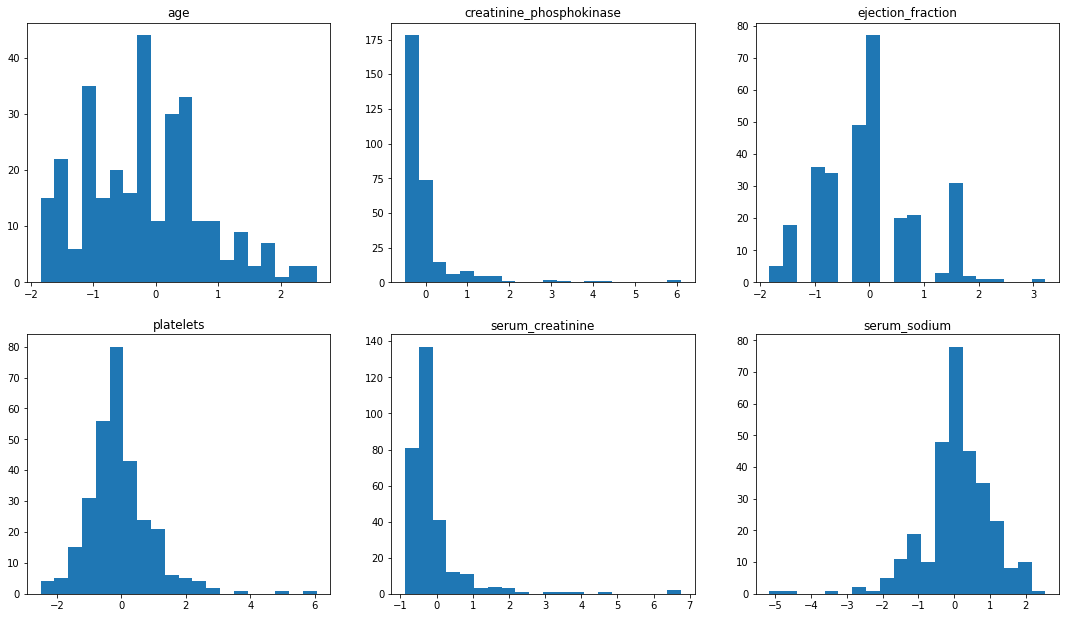

In [9]:
draw_plots(data_scaled)

In [10]:
data_scaled.shape

(299, 6)

In [11]:
get_data_info(data_scaled)

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
mean,-0.17,-0.02,0.01,-0.04,-0.11,0.04
std,0.96,0.82,0.91,1.02,0.89,0.97
min,-1.84,-0.49,-1.84,-2.51,-0.87,-5.17
max,2.57,6.10,3.23,6.06,6.76,2.54
variance,0.91,0.67,0.82,1.03,0.79,0.94
mode,-0.24,-0.02,-0.23,-0.04,-0.45,-0.10


In [12]:
scaler.mean_

array([6.29466667e+01, 6.07153333e+02, 3.79466667e+01, 2.66746749e+05,
       1.52060000e+00, 1.36453333e+02])

In [13]:
scaler.var_

array([1.54997156e+02, 1.41548882e+06, 1.70023822e+02, 9.25286050e+09,
       1.36052697e+00, 2.06078222e+01])

In [14]:
scaler_full = preprocessing.StandardScaler().fit(data)

In [15]:
scaler_full.mean_

array([6.08338930e+01, 5.81839465e+02, 3.80836120e+01, 2.63358029e+05,
       1.39387960e+00, 1.36625418e+02])

In [16]:
scaler_full.var_

array([1.41013284e+02, 9.38309881e+05, 1.39595016e+02, 9.53367655e+09,
       1.06663177e+00, 1.94048389e+01])

In [17]:
data_scaled_full = scaler_full.transform(data)

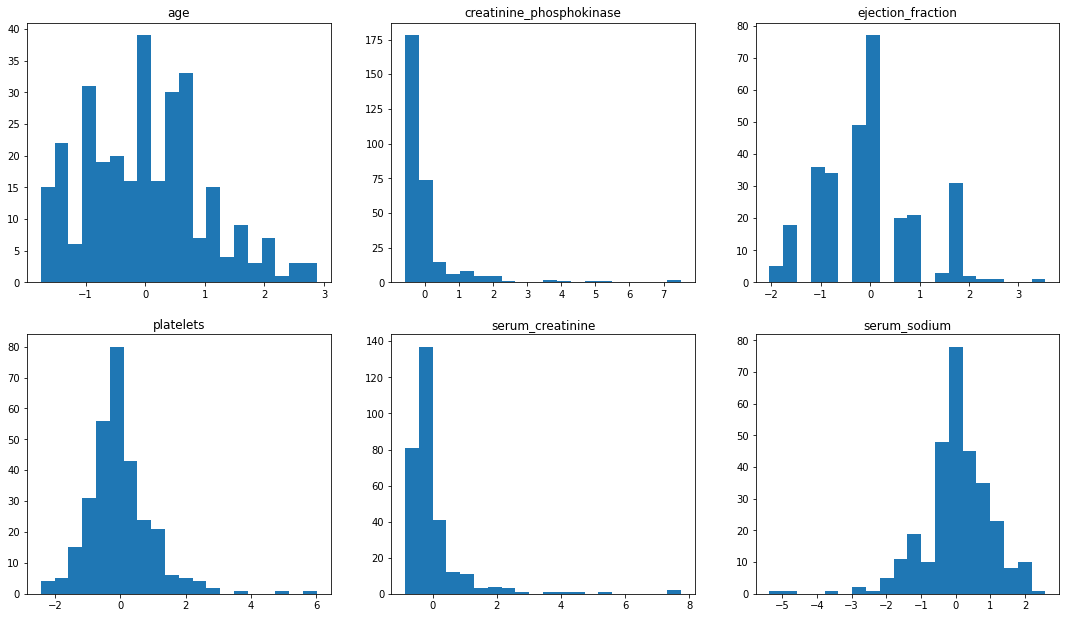

In [18]:
draw_plots(data_scaled_full)

In [19]:
get_data_info(data_scaled_full)

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
mean,0.00,0.00,-0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.75,-0.58,-2.04,-2.44,-0.87,-5.36
max,2.88,7.51,3.55,6.01,7.75,2.58
variance,1.00,1.00,1.00,1.00,1.00,1.00
mode,-0.07,0.00,-0.26,0.00,-0.38,-0.14


In [20]:
min_max_scaler = preprocessing.MinMaxScaler().fit(data)
data_min_max_scaled = min_max_scaler.transform(data)

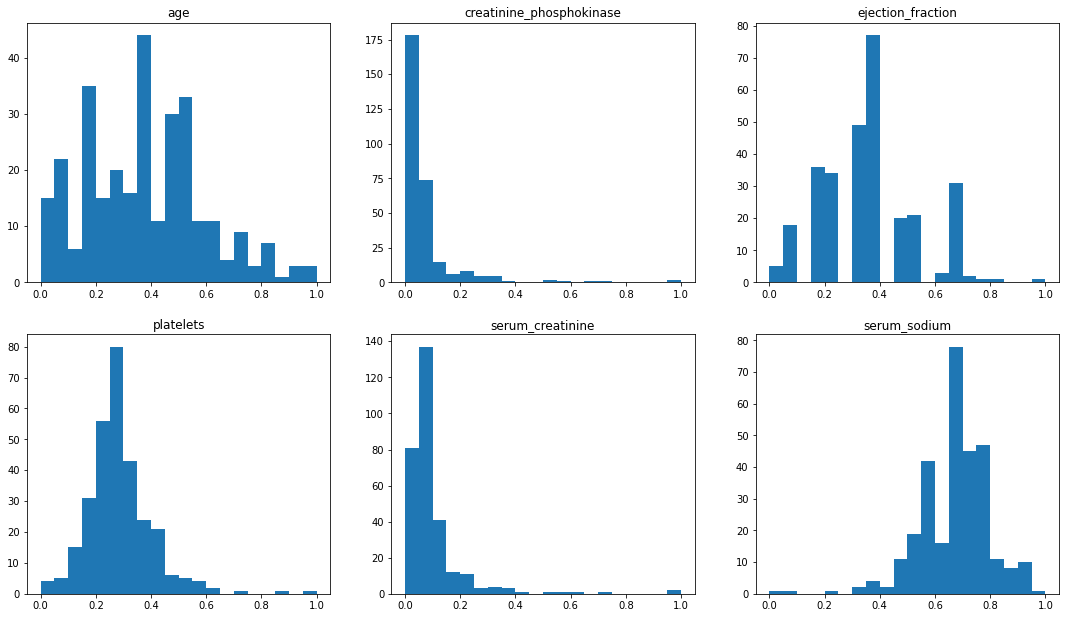

In [21]:
draw_plots(data_min_max_scaled)

In [22]:
get_data_info(data_min_max_scaled)

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
mean,0.38,0.07,0.36,0.29,0.10,0.68
std,0.22,0.12,0.18,0.12,0.12,0.13
min,0.00,0.00,0.00,0.00,0.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00
variance,0.05,0.02,0.03,0.01,0.01,0.02
mode,0.36,0.07,0.32,0.29,0.06,0.66
